<a href="https://colab.research.google.com/github/sb8919/Travelplus/blob/main/DL_model/KoBERT_%ED%83%9C%EA%B7%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%88%98%EB%9F%89_70%EA%B0%9C%EC%94%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ÏΩîÎû© ÌôòÍ≤ΩÏÑ§Ï†ïÏ†ï
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers==3.0.2
!pip install torch
#ÍπÉÌóàÎ∏åÏóêÏÑú KoBERT ÌååÏùº Î°úÎìú
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook
#kobert
from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

#transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49.1/49.1 MB 13.3 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 344.5/344.5 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp39-cp39-linux_x86_64.whl size=680540 sha256=820f15cfcc43e3dea72ccf963eb9efeda353bd17a36617177e49c62c23483373
  Stored in directory: /root/.cache/pip/wheels/47/17/70/b257bc53879a458c4bfcc900e89271aa8b4f19366a54bd2455
Succe

In [ ]:
# GPU ÏÇ¨Ïö©
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#BERT Î™®Îç∏, Vocabulary Î∂àÎü¨Ïò§Í∏∞
bertmodel, vocab = get_pytorch_kobert_model()
bertmodel.to(device)

/content/.cache/kobert_v1.zip[‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà]


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(8002, 768, padding_idx=1)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )

In [ ]:
print(device)

cuda:0


In [ ]:
#Íµ¨Í∏ÄÎìúÎùºÏù¥Î∏å Ïó∞Îèô
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ÎùºÎ≤®ÎßÅ ÌååÏùº Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÌòïÌÉúÎ°ú Í∞ÄÏ†∏Ïò§Í∏∞Í∏∞
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/labeling_data.xlsx')

In [ ]:
# 10Í∞úÏùò Îç∞Ïù¥ÌÑ∞ ÎûúÎç§ÏúºÎ°ú Ï∂úÎ†•
df.sample(n=10)

Unnamed: 0                                          sentences  \
2700        2700                  Î†àÎ¶øÍ≥†~‚ùÖ Î†àÎ¶øÍº¨Ïò§~‚òÉ‚ùÑÎπôÎ≤ΩÏùÑ Î∞∞Í≤ΩÏúºÎ°ú ÏÑ∏ÏõåÏßÑ ÏõêÏ£º Ìï´Ìîå!!   
2730        2730             Î∂ÄÎÜçÎî∏Í∏∞..2ÏãúÍ∞Ñ30Î∂ÑÎèôÏïà ÏßÑÌñâÌïòÎäîÏö∞Î¶¨Îì§ÎßåÏùò ÌîÑÎùºÏù¥ÎπóÌïú  ÌåúÌîºÌÅ¨Îãâ..   
2493        2493                     ÎèôÏû•Íµ∞ Ï†ÄÎ¶¨ ÎπÑÏºú! üòéÏ∂îÏö¥ Í≤®Ïö∏Ïóê Î∞©Î¨∏ÌïòÎ©¥ ÎçîÏö± Ï¢ãÏùÄ    
838          838  ÏïÑÏπ®Ïóê Ìï¥ÏàòÌÉï Î¨ºÎÜÄÏù¥ÌïòÍ≥† Î®πÎäîÏπºÍµ≠ÏàòÎ©¥ÏùÄ ÍøÄÎßõ‚ô°Îî∞ÎïÉÌïú Ìï¥ÏàòÌÉïÏóêÏÑú Î∞îÎã§ Î≥¥Í∏∞^^Ïù¥Í≤å Î¶¨...   
2416        2416  Í∏∏ÏóêÏÑú ÎÑòÏñ¥ÏßÄÎ©¥ ÏÇ¨ÎûåÎì§ÏùÄ Í∏∏ÏóêÏÑú ÎÑòÏñ¥ÏßÄÎ©¥ Î®ºÏ†Ä ÎèåÏùÑ ÌÉìÌïúÎã§ ÎßåÏïΩ ÎèåÏù¥ ÏóÜÏúºÎ©¥ Ïñ∏ÎçïÏùÑ...   
1472        1472  Ï≤òÏùå Í∞ÄÎ≥∏ Í≤ΩÏÉÅÎÇ®ÎèÑÏàòÎ™©Ïõê.Ïù¥ÏÅú Í∏∏, Ïù¥ÏÅú ÎÇòÎ¨¥Í∞Ä ÎßéÏïÑ ÏÇ¨ÏßÑÏ∞çÍ∏∞ Ï∞∏ Ï¢ãÏïòÎã§.‚úîÔ∏è Í≤ΩÏÉÅ...   
1305        1305  üôÇÏò§ÎäòÎèÑ ÎßéÏù¥ ÎçîÏö∞Î†§ÎÇòÏöî?üåûÏóêÏñ¥Ïª® ÎπµÎπµÌïòÍ≤å ÌãÄÏñ¥ÎÜìÍ≥† ÏûàÏùÑÍªòÏöî_üå¨Ïò§Î©∞Í∞ÄÎ©∞ Ìé∏ÌïòÍ≤å Îì§Î†§...   
593          593                          Í±¥Ï∂ïÏÉÅÏùÑ ÏàòÏÉÅÌïú ÏûêÏó∞ ÏÜç Í≥†Ï¶àÎÑâÌïú ÌûêÎßÅ Î™ÖÏÜåüåø   
1498        1498                                         ‚ùóÏßÄÎÇúÍ∞ÄÏùÑÏ∂îÏñµÏÜåÌôò    
2861        2861                                    ÏïÑÏßÅÏùÄ Ï°∞Ïö©Ìïú ÏïÑÏπ®ÏûÖÎãàÎã§.    

                                                   tags       place  label  
2700                                                NaN      Í∞ïÏõêÎèÑ ÏõêÏ£º    0.0  
2730  #ÌåúÌîºÌÅ¨Îãâ, #ÌîÑÎùºÏù¥ÎπóÌååÌã∞, #Î∂ÄÎÜçÎî∏Í∏∞, #Îî∏Í∏∞Î∞≠Î∂ÄÎÜç, #ÏòÅÏ≤úÍ≤®Ïö∏Ïó¨Ìñâ, #Ï≤¥ÌóòÎÜçÏû•,...     Í≤ΩÏÉÅÎ∂ÅÎèÑ ÏòÅÏ≤ú    1.0  
2493  #Ìï©Ï≤ú, #Ïã§ÎÇ¥Ïó¨ÌñâÏßÄ, #Ï†ÑÏãúÏã§, #Ìï©Ï≤úÏã§ÎÇ¥Ïó¨ÌñâÏßÄ, #Ìï©Ï≤úÏó¨Ìñâ, #Ìï©Ï≤úÏó¨ÌñâÏßÄ, #Ìï©...         NaN    1.0  
838   #ÏûêÏø†ÏßÄÏàôÏÜå, #Í∞ïÌôîÏàôÏÜå, #Í∞ïÌôîÎèÑÏàôÏÜå, #ÎßàÎ†àÌï¥ÏàòÌéúÏÖò, #ÎßàÎ†à616, #@mare...         NaN    3.0  
2416                        #Í∞ïÏßÑÌïòÎ©úÎèôÏÉÅ, #ÏÇ¨ÏßÑÏó¨ÌñâÍ∞ÄÏÜêÏû•ÌòÅ, #Í∞ïÏßÑÍ≤®Ïö∏Ïó¨Ìñâ         NaN    1.0  
1472  #ÏßÑÏ£ºÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥, #ÏßÑÏ£ºÎ™ÖÏÜå, #ÏßÑÏ£ºÌï´Ìîå, #Ïª§ÌîåÏÇ¨ÏßÑ, #Ïª§ÌîåÎç∞Ïù¥Ìä∏, #Í≤ΩÏÉÅÎÇ®ÎèÑÏàòÎ™©...         NaN    2.0  
1305  #ÏàòÏöîÏùº, #ÌïòÏù¥ÎØ∏Îãà.., #Í≥†ÏÑ±ÏÜåÌíàÏÉµ, #Í≥†ÏÑ±ÏÜåÌíàÍ∞ÄÍ≤å, #Í≤ΩÎÇ®ÏÜåÌíàÏÉµ, #Í≤ΩÎÇ®ÏÜåÌíàÍ∞Ä...         NaN    2.0  
593   #Í∞ïÏõêÎèÑ, #Í≥†ÏÑ±, #ÏÑúÎ°úÏû¨, #ÏöîÏ¶òÏàôÏÜå_Í≥†ÏÑ±, #Í≥†ÏÑ±ÌéúÏÖò, #Í≥†ÏÑ±ÌíÄÎπåÎùº, #Í≥†ÏÑ±Ïó¨...         NaN    1.0  
1498            #Í≥µÏ£ºÎ©îÌÉÄÏÑ∏ÏΩ∞Ïù¥Ïñ¥Í∏∏üçÅüçÇ, #Í≥µÏ£ºÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥, #Í≥µÏ£ºÏùòÍ∞ÄÏùÑ, #Í≥µÏ£ºÍ∞ÄÏùÑÏó¨Ìñâ  Í≥µÏ£º Î©îÌÉÄÏÑ∏ÏΩ∞Ïù¥Ïñ¥Í∏∏    1.0  
2861  #Í≥°ÏÑ±, #Í≥°ÏÑ±Ïπ¥Ìéò, #Í≥°ÏÑ±ÎßõÏûàÎäîÏª§Ìîº, #Í≥°ÏÑ±Í≤®Ïö∏Ïó¨Ìñâ, #ÏΩîÏãúÎ¶∞Í≤®Ïö∏Ïó¨Ìñâ, #Í∑∏Î¶¨Í≥°ÏÑ±...         NaN    1.0

In [ ]:
# label Ïó¥Ïùò Í∞í float-> str
df['label'] = df['label'].astype(str)

In [ ]:
df.dtypes

Unnamed: 0     int64
sentences     object
tags          object
place         object
label         object
dtype: object

In [ ]:
# label Î∂ÑÎ•ò Ïà´ÏûêÎ°ú Î≥ÄÍ≤ΩÍ≤Ω
df.loc[(df['label'] == "0.0"), 'label'] = 0  #0.0 => Ïä§Ìå∏ => 0
df.loc[(df['label'] == "1.0"), 'label'] = 1  #1.0 => Í∞ÄÎ≥ºÎßåÌïúÍ≥≥ => 1
df.loc[(df['label'] == "2.0"), 'label'] = 2  #2.0 => Í∞ÄÏ°±Ïó¨Ìñâ => 2
df.loc[(df['label'] == "3.0"), 'label'] = 3  #3.0 => Í¥ÄÎûå => 3
df.loc[(df['label'] == "4.0"), 'label'] = 4  #4.0 => ÎßõÏßë => 4
df.loc[(df['label'] == "5.0"), 'label'] = 5  #5.0 => Ïö∞Ï†ïÏó¨Ìñâ => 5
df.loc[(df['label'] == "6.0"), 'label'] = 6  #6.0 => Ï†ÑÌÜµ => 6
df.loc[(df['label'] == "7.0"), 'label'] = 7  #7.0 => Ï≤¥Ìóò => 7
df.loc[(df['label'] == "8.0"), 'label'] = 8  #8.0 => Ïπ¥Ìéò => 8
df.loc[(df['label'] == "9.0"), 'label'] = 9  #9.0 => Ï∫†ÌïëÌïë => 9

<Axes: >

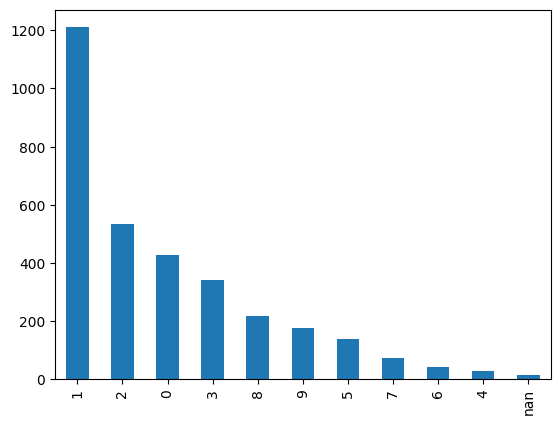

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†úÌïòÍ∏∞
# label Í∞í Î∂ÑÌè¨ ÌôïÏù∏Ïù∏
df['label'].value_counts().plot(kind = 'bar')

#Ïã§Ìóò
# df = df[df['label'] != 1]
# df = df[df['label'] != 2]

In [ ]:
df['label'].value_counts()

1      1211
2       533
0       427
3       341
8       217
9       175
5       138
7        74
6        43
4        28
nan      13
Name: label, dtype: int64

In [ ]:
# Null Í∞í Ïú†Î¨¥ ÌôïÏù∏ True <- Null Í∞í ÏûàÏùåÏùå
print(df.isnull().values.any())

True


In [ ]:

# Ïñ¥Îñ§ Ïó¥ÏóêÏÑú Null Í∞í Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
print(df.isnull().sum())

Unnamed: 0       0
sentences        1
tags           301
place         2005
label            0
dtype: int64


In [ ]:
# Null Í∞í ÎßéÏùÄ place Ïó¥ Ï†úÍ±∞Í±∞
df = df.drop('place',axis=1)

In [ ]:
# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏Ïù∏
df

Unnamed: 0                                          sentences  \
0              0                                                NaN   
1              1  Í∞ïÎÇ® ÏßÅÏû•Ïù∏ÏùÑ ÏúÑÌïú ÎßõÏßë 8Í≥≥ÏùÑ Ï∂îÏ≤úÌï¥ ÎìúÎ¶ΩÎãàÎã§. Î∞©ÏÜ°ÏóêÎèÑ Ïó¨Îü¨ Î≤à ÏÜåÍ∞úÎêú Í≥≥Î∂ÄÌÑ∞ ...   
2              2  Ïà†Ïù¥ Îã¨Îã§ !!ÎùºÍ≥† ÌïòÎäîÍ±∏ Ïù¥Í±∏Î≥¥Íµ¨ ÎßêÌïòÎÇòÎ¥êÏöîÏïåÏì∞Îì§ÎèÑ Î¨¥ÌïúÎåÄÎ°ú ÎßàÏã§Ïàò ÏûàÎäî Ïó∞ÎßêÏùÑ ...   
3              3                                                  ‚Ä¢   
4              4                                                  ‚Ä¢   
...          ...                                                ...   
3195        3195  Ïù¥Ï†ú..Ï†ïÎßê Î¥ÑÏù¥ÎÑ§Ïöî~~~^^ Ïó¨Í∏∞ Ï†ÄÍ∏∞ ÍΩÉÏù¥ ÎßåÎ∞úÌïòÎãà...Ïñ¥Î¶∞ÏïÑÏù¥Îì§Î∂ÄÌÑ∞ Ïñ¥Î•¥Ïã†Îì§Íπå...   
3196        3196  Ïù¥Ï†ú..Ï†ïÎßê Î¥ÑÏù¥ÎÑ§Ïöî~~~^^ Ïó¨Í∏∞ Ï†ÄÍ∏∞ ÍΩÉÏù¥ ÎßåÎ∞úÌïòÎãà...Ïñ¥Î¶∞ÏïÑÏù¥Îì§Î∂ÄÌÑ∞ Ïñ¥Î•¥Ïã†Îì§Íπå...   
3197        3197  Ïù¥Ï†ú..Ï†ïÎßê Î¥ÑÏù¥ÎÑ§Ïöî~~~^^ Ïó¨Í∏∞ Ï†ÄÍ∏∞ ÍΩÉÏù¥ ÎßåÎ∞úÌïòÎãà...Ïñ¥Î¶∞ÏïÑÏù¥Îì§Î∂ÄÌÑ∞ Ïñ¥Î•¥Ïã†Îì§Íπå...   
3198        3198                -Î∞∞ÍΩÉÌîºÏñ¥ÎÇòÎäî ÎÇ†Ïóê..Î≤öÍΩÉ, Îß§ÌôîÎßåÌÅºÏù¥ÎÇò ÏòàÏÅú Î∞∞ÍΩÉÏù¥ ÌîºÍ≥†ÏûàÏñ¥Ïöî   
3199        3199                -Î∞∞ÍΩÉÌîºÏñ¥ÎÇòÎäî ÎÇ†Ïóê..Î≤öÍΩÉ, Îß§ÌôîÎßåÌÅºÏù¥ÎÇò ÏòàÏÅú Î∞∞ÍΩÉÏù¥ ÌîºÍ≥†ÏûàÏñ¥Ïöî   

                                                   tags label  
0                                                 #Îç∞Ïù¥Ìä∏Î¶Ω     0  
1                                                   NaN     0  
2     #ÏÑ†Î¶â, #ÌèâÏÉÅÏà†Ïßë, #Ïà†, #Ïà†Ïßë, #Ïà†ÏïàÏ£º, #ÍøÄÏ£º, #ÍøÄÎßâÍ±∏Î¶¨, #ÎßâÍ±∏Î¶¨, #...     8  
3     #Í∞ïÎÇ®Ïπ¥Ìéò, #Í∞ïÎÇ®ÎåÄÌòïÏπ¥ÌéòÎèÑÏã¨, #Ïπ¥Ï¶ê_ÏÑúÏö∏, #Ïπ¥Ï¶ê_Í∞ïÎÇ®, #Ïπ¥Ï¶ê_Í∞ÄÎ°úÏàòÍ∏∏, #Ïπ¥...     1  
4     #Í∞ïÎÇ®Ïπ¥Ìéò, #Í∞ïÎÇ®ÎåÄÌòïÏπ¥ÌéòÎèÑÏã¨, #Ïπ¥Ï¶ê_ÏÑúÏö∏, #Ïπ¥Ï¶ê_Í∞ïÎÇ®, #Ïπ¥Ï¶ê_Í∞ÄÎ°úÏàòÍ∏∏, #Ïπ¥...     2  
...                                                 ...   ...  
3195  #24Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§Ïù∏Ìò∏ÌÖî, #ÏàúÏ≤úÍ≤åÏä§Ìä∏ÌïòÏö∞Ïä§Ï∂îÏ≤ú, #ÏàúÏ≤úÍ≤åÏä§Ìä∏ÌïòÏö∞Ïä§, #ÏàúÏ≤ú24Í≤åÏä§Ìä∏...     2  
3196  #24Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§Ïù∏Ìò∏ÌÖî, #ÏàúÏ≤úÍ≤åÏä§Ìä∏ÌïòÏö∞Ïä§Ï∂îÏ≤ú, #ÏàúÏ≤úÍ≤åÏä§Ìä∏ÌïòÏö∞Ïä§, #ÏàúÏ≤ú24Í≤åÏä§Ìä∏...     5  
3197  #24Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§Ïù∏Ìò∏ÌÖî, #ÏàúÏ≤úÍ≤åÏä§Ìä∏ÌïòÏö∞Ïä§Ï∂îÏ≤ú, #ÏàúÏ≤úÍ≤åÏä§Ìä∏ÌïòÏö∞Ïä§, #ÏàúÏ≤ú24Í≤åÏä§Ìä∏...     7  
3198  #ÎÇôÏïàÎØºÏÜçÏ¥å, #Î∞∞, #ÏàúÏ≤ú, #ÎÇôÏïà, #Î∞∞ÍΩÉ, #Ï≤úÍµ≠, #Ïó¨Ìñâ, #ÏÇ¨ÏßÑ, #ÏàúÏ≤úÍ∞Ä...     1  
3199  #ÎÇôÏïàÎØºÏÜçÏ¥å, #Î∞∞, #ÏàúÏ≤ú, #ÎÇôÏïà, #Î∞∞ÍΩÉ, #Ï≤úÍµ≠, #Ïó¨Ìñâ, #ÏÇ¨ÏßÑ, #ÏàúÏ≤úÍ∞Ä...     5  

[3200 rows x 4 columns]

In [ ]:
# Ïñ¥Îñ§ Ïó¥ÏóêÏÑú Null Í∞í Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
print(df.isnull().sum())

Unnamed: 0      0
sentences       1
tags          301
label           0
dtype: int64


In [ ]:
# NullÍ∞í Ï†úÍ±∞
df = df.dropna(how = 'any') # Null Í∞íÏù¥ Ï°¥Ïû¨ÌïòÎäî Ìñâ Ï†úÍ±∞
print(df.isnull().values.any()) # Null Í∞íÏù¥ Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏

False


In [ ]:
# NullÍ∞í Ï†úÍ±∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏Ïù∏
print(len(df))

2898


In [ ]:
# ÎùºÎ≤® Í∞íÎ≥ÑÎ°ú 70Í∞úÏî©Îßå ÏÑ†ÌÉù
label_counts = df['label'].value_counts()
selected_indices = []
for label in label_counts.index:
    label_indices = df[df['label'] == label].index.tolist()
    selected_indices += label_indices[:70]
selected_df = df.loc[selected_indices]

# Í≤∞Í≥º ÌôïÏù∏
print(selected_df['label'].value_counts())

1      70
2      70
3      70
0      70
8      70
9      70
5      70
7      69
6      42
4      28
nan     9
Name: label, dtype: int64


In [ ]:
df = selected_df

1      70
2      70
3      70
0      70
8      70
9      70
5      70
7      69
6      42
4      28
nan     9
Name: label, dtype: int64


638

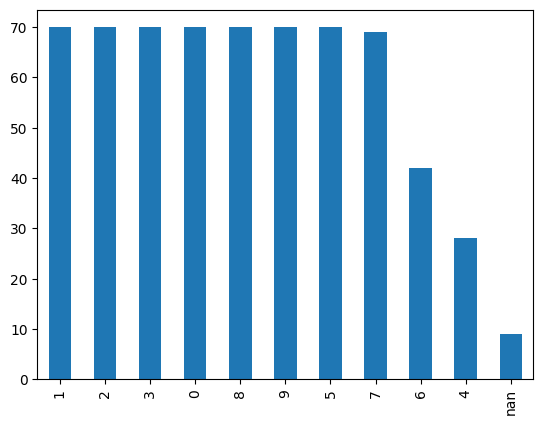

In [ ]:
df['label'].value_counts().plot(kind = 'bar')
print(df['label'].value_counts())
len(df)

In [ ]:
# data_listÏóê Î≥∏Î¨∏Í≥º ÎùºÎ≤®ÎßÅÎêú Í∞í Ï†ÄÏû•Ïû•
data_list = []
for q, label in zip(df['tags'], df['label'])  :
    if q.strip() == '' or q.strip() == '.':
        print(q)
        continue
    data = []
    data.append(q)
    data.append(str(label))

    data_list.append(data)

In [ ]:
print(data_list[0])
print(data_list[500])
#print(data_list[1200])
# print(data_list[1800])
# print(data_list[2400])
# print(data_list[2800])
# print(data_list[-1])

['#Í∞ïÎÇ®Ïπ¥Ìéò, #Í∞ïÎÇ®ÎåÄÌòïÏπ¥ÌéòÎèÑÏã¨, #Ïπ¥Ï¶ê_ÏÑúÏö∏, #Ïπ¥Ï¶ê_Í∞ïÎÇ®, #Ïπ¥Ï¶ê_Í∞ÄÎ°úÏàòÍ∏∏, #Ïπ¥Ï¶ê_Ïã†ÏÇ¨, #Ïπ¥Ï¶ê_ÎèÑÏÇ∞, #Í∞ïÎÇ®Ïπ¥ÌéòÏ∂îÏ≤ú, #Í∞ïÎÇ®Îç∞Ïù¥Ìä∏ÏΩîÏä§, #Í∞ïÎÇ®Í∞ÄÎ≥ºÎßåÌïúÍ≥≥, #Í∞ïÎÇ®Ìï´Ìîå, #Í∞ïÎÇ®ÎßõÏßë, #Í∞ïÎÇ®Î∏åÎü∞Ïπò', '1']
['#Í≥†Ìù•Ïó¨Ìñâ, #Í≥†Ìù•ÎØºÎ∞ï, #Í≥†Ìù•ÌéúÏÖò, #Í≥†Ìù•1Î∞ï2Ïùº, #Í≥†Ìù•Í∞ÄÎ≥ºÎßåÌïúÍ≥≥, #Í≥†Ìù•ÎÇòÎì§Ïù¥, #Í≥†Ìù•Ïª§ÌîåÏó¨Ìñâ, #Ïª§ÌîåÏó¨Ìñâ, #Ï£ºÎßêÏó¨Ìñâ, #Ïó¨Î¶ÑÌú¥Í∞Ä, #Í≥†Ìù•Ìú¥Í∞Ä, #Í≥†Ìù•Ïó¨Î¶ÑÌú¥Í∞Ä, #Ï†ÑÎÇ®Í≥†Ìù•, #Ï†ÑÎÇ®Í∞ÄÎ≥ºÎßåÌïúÍ≥≥, #Ï†ÑÎÇ®Ïó¨Ìñâ, #Ï†ÑÎÇ®ÎÇòÎì§Ïù¥, #Ï†ÑÎÇ®Ìú¥Í∞Ä, #Ï†ÑÎùºÎÇ®ÎèÑÏó¨ÌñâÏ∂îÏ≤ú, #Í≥†Ìù•Ïó¨ÌñâÏΩîÏä§, #Í≥†Ìù•1Î∞ï2ÏùºÏó¨ÌñâÏΩîÏä§, #Í≥†Ìù•Ïö∞Ï£ºÎ∞úÏÇ¨Ï†ÑÎßùÎåÄ, #Í≥†Ìù•Î∞©Ï°∞Ï†ú, #Í≥†Ìù•Îßå, #Í≥†Ìù•Ïö∞Ï£ºÍ≥ºÌïôÍ¥Ä, #ÎÇòÎ°úÌò∏, #Í∏àÏÇ∞Ìï¥ÏïàÍ≤ΩÍ¥Ä, #Í≥†Ìù•ÏàôÎ∞ï, #Ïö©Î∞îÏúÑ, #ÏòÅÎÇ®Ïö©Î∞îÏúÑ, #Ïö©Ïã†', '7']


In [ ]:
#train & test Îç∞Ïù¥ÌÑ∞Î°ú ÎÇòÎàÑÍ∏∞ train 80 test 20
from sklearn.model_selection import train_test_split
                                                         
dataset_train, dataset_test = train_test_split(data_list, test_size=0.2, random_state=0)

In [ ]:
# train data, test data Í∞úÏàò ÌôïÏù∏Ïù∏
print(len(dataset_train))
print(len(dataset_test))

510
128


In [ ]:
# Í∞Å Îç∞Ïù¥ÌÑ∞Í∞Ä KoBERT Î™®Îç∏Ïùò ÏûÖÎ†•Ïóê Îì§Ïñ¥Í∞à Ïàò ÏûàÎäî ÌòïÌÉúÍ∞Ä ÎêòÎèÑÎ°ù
# ÌÜ†ÌÅ∞Ìôî, Ï†ïÏàò Ïù∏ÏΩîÎî©, Ìå®Îî© ÌïÑÏöî
# ÌÜ†ÌÅ∞ÌôîÎ•º ÏúÑÌïú ÌÅ¥ÎûòÏä§ Ï†ïÏùòÏùò 
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = []
        #ÏúÑ Î∂ÄÎ∂ÑÏóêÏÑú labelÏùò nanÍ∞íÏùÄ Í±¥ÎÑàÎõ∞Í≤å ÏàòÏ†ï
        for i in dataset:
            if i[label_idx] != 'nan':
                self.labels.append(np.int32(i[label_idx]))

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
# ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Ï†ïÏùò
max_len = 64
batch_size = 64
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [ ]:
#ÌÜ†ÌÅ∞Ìôî & Ìå®Îî© 
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~ ÏúÑ ÏóêÎü¨ Ìï¥Í≤∞ ÌõÑ ÏïÑÎûò ÏÖÄ Ïã§Ïãú ~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
# ÌÜ†ÌÅ∞Ìôî Ìå®Îî© Ïûò Ïù¥Î£®Ïñ¥Ï°åÎäîÏßÄ ÌôïÏù∏
# Ìå®Îî©Îêú ÏãúÌÄÄÏä§, Í∏∏Ïù¥ÏôÄ ÌÉÄÏûÑÏóê ÎåÄÌïú ÎÇ¥Ïö©, Ïñ¥ÌÖêÏÖò ÎßàÏä§ÌÅ¨ ÏãúÌÄÄÏä§Ïä§
data_train[0]

(array([   2,  517,    9, 1098, 6925, 7533, 6664,  517,   46,  517,    9,
        4297, 6516, 7063, 7020, 7318,  517,   46,  517,    9, 4297, 6516,
        7063, 7020, 7318, 6213, 5725, 6050, 7126,  517,   46,  517,    9,
        4297, 6516, 7063, 7020, 7318, 6122, 7753, 7659,  517,   46,  517,
           9, 1098, 7525, 6438, 7495,  517,   46,  517,    9, 1098, 6925,
         517,   46,  517,    9, 1098, 5411, 7013, 6925,    3], dtype=int32),
 array(64, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32),
 5)

In [ ]:
# torchÌòïÏãùÏùò dataset ÎßåÎì§Í∏∞Í∏∞
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

In [ ]:
# KoBERT Î™®Îç∏
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=10,   ## 10Í∞ú Î∂ÑÎ•ò
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        token_ids = token_ids.to(device)
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
# BERT Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

# optimizerÏôÄ schedule ÏÑ§Ï†ï
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

# Ï†ïÌôïÎèÑ Ï∏°Ï†ïÏùÑ ÏúÑÌïú Ìï®Ïàò Ï†ïÏùò
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
    
train_dataloader

In [ ]:
# KoBERT Î™®Îç∏ ÌïôÏäµ
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

<ipython-input-52-1803b6aa9ec1>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 2.413517951965332 train acc 0.03125
epoch 1 train acc 0.06975446428571429


<ipython-input-52-1803b6aa9ec1>:24: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/2 [00:00<?, ?it/s]

epoch 1 test acc 0.07966188524590165


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 2.351128101348877 train acc 0.09375
epoch 2 train acc 0.10491071428571429


  0%|          | 0/2 [00:00<?, ?it/s]

epoch 2 test acc 0.1518954918032787


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 2.3234307765960693 train acc 0.046875
epoch 3 train acc 0.09626116071428571


  0%|          | 0/2 [00:00<?, ?it/s]

epoch 3 test acc 0.055455942622950824


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 2.2791943550109863 train acc 0.15625
epoch 4 train acc 0.12332589285714285


  0%|          | 0/2 [00:00<?, ?it/s]

epoch 4 test acc 0.055455942622950824


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 2.3007447719573975 train acc 0.109375
epoch 5 train acc 0.103515625


  0%|          | 0/2 [00:00<?, ?it/s]

epoch 5 test acc 0.055455942622950824


In [ ]:
#ÌÜ†ÌÅ∞Ìôî
tokenizer = get_tokenizer()

tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
import numpy as np
from scipy.special import softmax

def predict(predict_sentence):
    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tok, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)

    model.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)

        test_eval=[]
        for i in out:
            logits=i
            logits = logits.detach().cpu().numpy()

            # logitsÏùÑ ÌôïÎ•†Î°ú Î≥ÄÌôò (ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ)
            probabilities = softmax(logits)
            probability_percent = probabilities * 100

            if np.argmax(logits) == 0:
                test_eval.append("Ïä§Ìå∏")
            elif np.argmax(logits) == 1:
                test_eval.append("Í∞ÄÎ≥ºÎßåÌïúÍ≥≥")
            elif np.argmax(logits) == 2:
                test_eval.append("Í∞ÄÏ°±Ïó¨Ìñâ")
            elif np.argmax(logits) == 3:
                test_eval.append("Ïö∞Ï†ïÏó¨Ìñâ")
            elif np.argmax(logits) == 4:
                test_eval.append("Ï†ÑÌÜµ")
            elif np.argmax(logits) == 5:
                test_eval.append("Ï≤¥Ìóò")
            elif np.argmax(logits) == 6:
                test_eval.append("Ï∫†Ìïë")
            elif np.argmax(logits) == 7:
                test_eval.append("Í¥ÄÎûå")
            elif np.argmax(logits) == 8:
                test_eval.append("ÎßõÏßë")
            elif np.argmax(logits) == 9:
                test_eval.append("Ïπ¥Ìéò")

            print(test_eval[0] + " Î°ú ÏòàÏ∏°Îê©ÎãàÎã§.")
            
             # logitsÏùÑ ÌôïÎ•†Î°ú Î≥ÄÌôò
            probabilities = softmax(logits)
            probability_percent = probabilities * 100

            # Ïπ¥ÌÖåÍ≥†Î¶¨ Î†àÏù¥Î∏î Î∞è Ïù∏Îç±Ïä§
            category_labels = ["Ïä§Ìå∏", "Í∞ÄÎ≥ºÎßåÌïúÍ≥≥", "Í∞ÄÏ°±Ïó¨Ìñâ", "Ïö∞Ï†ïÏó¨Ìñâ", "Ï†ÑÌÜµ", "Ï≤¥Ìóò", "Ï∫†Ìïë", "Í¥ÄÎûå", "ÎßõÏßë", "Ïπ¥Ìéò"]

            # Í∞ÄÏû• ÎÜíÏùÄ ÌôïÎ•†ÏùÑ Í∞ÄÏßÑ Ïπ¥ÌÖåÍ≥†Î¶¨ Ï∂úÎ†•
            predicted_label = np.argmax(logits)
            print(f"{category_labels[predicted_label]} Î°ú ÏòàÏ∏°Îê©ÎãàÎã§.")

            # Î™®Îì† Ïπ¥ÌÖåÍ≥†Î¶¨Ïóê ÎåÄÌïú ÌôïÎ•† Ï∂úÎ†•
            for idx, label in enumerate(category_labels):
                print(f"{label}: {probability_percent[idx]:.2f}%")


In [ ]:
PATH = "model.pt"
torch.save(model.state_dict(), PATH)


In [ ]:
for data, answer in dataset_test:
  print('Ìï¥ÏãúÌÉúÍ∑∏: '+data)
  predict(data)
  an = str(answer)
  print('Ï†ïÎãµ: '+ an.replace('0','Ïä§Ìå∏').replace('1','Í∞ÄÎ≥ºÎßåÌïúÍ≥≥').replace('2','Í∞ÄÏ°±Ïó¨Ìñâ').replace('3','Ïö∞Ï†ïÏó¨Ìñâ').replace('4','Ï†ÑÌÜµ').replace('5','Ï≤¥Ìóò').replace('6','Ï∫†Ìïë').replace('7','Í¥ÄÎûå').replace('8','ÎßõÏßë').replace('9','Ïπ¥Ìéò'))
  print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------')

Ìï¥ÏãúÌÉúÍ∑∏: #Ìä∏Î¶ΩÎ©îÏù¥Ìä∏, #Í∞ÄÏùÑ, #Í∞ÄÏùÑÏó¨Ìñâ, #ÏùòÏôïÍ∞ÄÏùÑÏó¨Ìñâ, #ÏÑúÏö∏Í∑ºÏ≤òÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥, #ÏÑúÏö∏Í∑ºÏ≤òÍ∞ÄÏùÑÏó¨Ìñâ, #Í≤ΩÍ∏∞ÎèÑÍ∞ÄÏùÑÏó¨Ìñâ, #ÏùòÏôïÎßõÏßë, #ÏôïÏÜ°Ìò∏ÏàòÎßõÏßë, #ÏùòÏôïÎ∏åÎü∞Ïπò, #ÏùòÏôïÎπµÏßë, #ÏùòÏôïÌï´Ìîå, #Í∞ÄÏùÑÌíçÍ≤Ω, #ÏùòÏôïÏï†ÏôÑÍ≤¨ÎèôÎ∞ò, #ÏùòÏôïÎ†àÏùºÎ∞îÏù¥ÌÅ¨, #Î†àÏùºÎ∞îÏù¥ÌÅ¨, #Î†àÏÜîÎ†àÌååÌÅ¨, #ÏôïÏÜ°Ìò∏Ïàò, #ÏôïÏÜ°Ìò∏ÏàòÏ∫†ÌïëÏû•, #ÏôïÏÜ°Ìò∏ÏàòÏπ¥Ìéò
Í∞ÄÏ°±Ïó¨Ìñâ Î°ú ÏòàÏ∏°Îê©ÎãàÎã§.
Í∞ÄÏ°±Ïó¨Ìñâ Î°ú ÏòàÏ∏°Îê©ÎãàÎã§.
Ïä§Ìå∏: 10.60%
Í∞ÄÎ≥ºÎßåÌïúÍ≥≥: 10.16%
Í∞ÄÏ°±Ïó¨Ìñâ: 12.59%
Ïö∞Ï†ïÏó¨Ìñâ: 10.61%
Ï†ÑÌÜµ: 5.40%
Ï≤¥Ìóò: 11.07%
Ï∫†Ìïë: 7.24%
Í¥ÄÎûå: 10.20%
ÎßõÏßë: 11.33%
Ïπ¥Ìéò: 10.81%
Ï†ïÎãµ: Ï≤¥Ìóò
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Ìï¥ÏãúÌÉúÍ∑∏: #ÏòàÏà†Í≥µÍ∞ÑÍ≤∞, #Ï†ÑÏ£ºÏπ¥ÌéòÎåÄÍ¥Ä, #Ï†ÑÏ£ºÍ∞§Îü¨Î¶¨ÎåÄÍ¥Ä, #Ï†ÑÏ£ºÏã§ÎÇ¥Îç∞Ïù¥Ìä∏, #Ï†ÑÏ£ºÏó¨ÌñâÏΩîÏä§, #Ï†ÑÏ£ºÎÜÄÍ±∞Î¶¨, #Ï†ÑÏ£ºÏãúÌã∞Ìà¨Ïñ¥, #Ï†ÑÏ£ºÏ≤¥Ìóò, 